In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib  import style
from collections import Counter
style.use('fivethirtyeight')
from math import sqrt

In [2]:
dataset = {'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}

In [3]:
dataset


{'k': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}

In [4]:
new_features = [5,7]

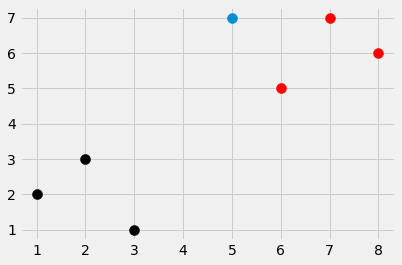

In [6]:
[[plt.scatter(ii[0],ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],s = 100)

In [7]:
def k_nearest_neighbors(data,predict, k =3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups')
    #knnalgo
    distances = []
    for group in data:
        for features in data[group]:
            #euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2) #good only for 2D
            #euclidean_distance = np.sqrt(np.sum ((np.array(features)-np.array(predict))**2)) #using numpy
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])
        
        votes = [i[1] for i in sorted(distances)[:k]]
        print(Counter(votes).most_common(1))
        vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result 

In [8]:
dataset

{'k': [[1, 2], [2, 3], [3, 1]], 'r': [[6, 5], [7, 7], [8, 6]]}

In [9]:
result = k_nearest_neighbors(dataset,new_features,k = 3) 

[('k', 3)]
[('r', 3)]


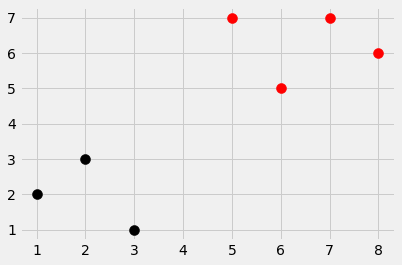

In [10]:
[[plt.scatter(ii[0],ii[1], s = 100, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0],new_features[1],color=result,s=100)

In [13]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/ajaykuma/Datasets/master/breast-cancer-wisconsin.csv")

In [14]:
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [15]:
df.replace('?', -99999,inplace=True) 

In [16]:
df.drop(['id'], 1, inplace=True)

In [17]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [18]:
full_data = df.astype(float).values.tolist()

In [19]:
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [21]:
import random
random.shuffle(full_data)

In [22]:
test_size = 0.2

In [23]:
train_set = {2:[],4:[]}

In [24]:
train_set

{2: [], 4: []}

In [25]:
test_set = {2:[],4:[]}

In [26]:
len(full_data)

699

In [27]:
train_data = full_data[:-int(test_size*len(full_data))]

In [28]:
test_data = full_data[-int(test_size*len(full_data)):]

In [29]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])

In [30]:
train_set

{2: [[1.0, 1.0, 4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 5.0, 3.0, 2.0],
  [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, -99999.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [6.0, 3.0, 3.0, 5.0, 3.0, 10.0, 3.0, 5.0, 3.0],
  [6.0, 9.0, 7.0, 5.0, 5.0, 8.0, 4.0, 2.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [2.0, 1.0

In [31]:
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [32]:
correct = 0
total = 0

In [38]:
train_set[2][0:10]

[[1.0, 1.0, 4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [4.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0],
 [3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
 [1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 5.0, 3.0, 2.0],
 [1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0]]

In [39]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k =5)
        if group == vote:
            correct +=1
        total += 1
print('Accuracy', correct/total)

[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 4)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(4, 4)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(4, 3)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[(2, 5)]
[